# Summary

Part 1 of reinforcement learning programming assignment 1.

## TODO
1. Figure out policy iteration.
2. Get LOG working.
3. Uniform binning.
4. Read and write log to disk.
5. Log average return per episode and log converged episode.
6. Plot 3D.
7. Timeit function.
8. Stability and efficiency. 

# Imports/Setup

In [1]:
import utils
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import performance_logger
import evalutaions

In [2]:
env = utils.get_env()

/data/users/jupyter-dam724/.local/lib/python3.9/site-packages/gymnasium/envs/registration.py:523: DeprecationWarning: WARN: The environment CartPole-v0 is out of date. You should consider upgrading to version `v1`.
  logger.deprecation(


*Configuation data for experiments.*

In [3]:
class Config:
    nbins = 50

# Discretization

Use randomly sampled observations from the continous environment to choose a binning strategy.

In [4]:
observation_data = utils.get_state_distribution(env)

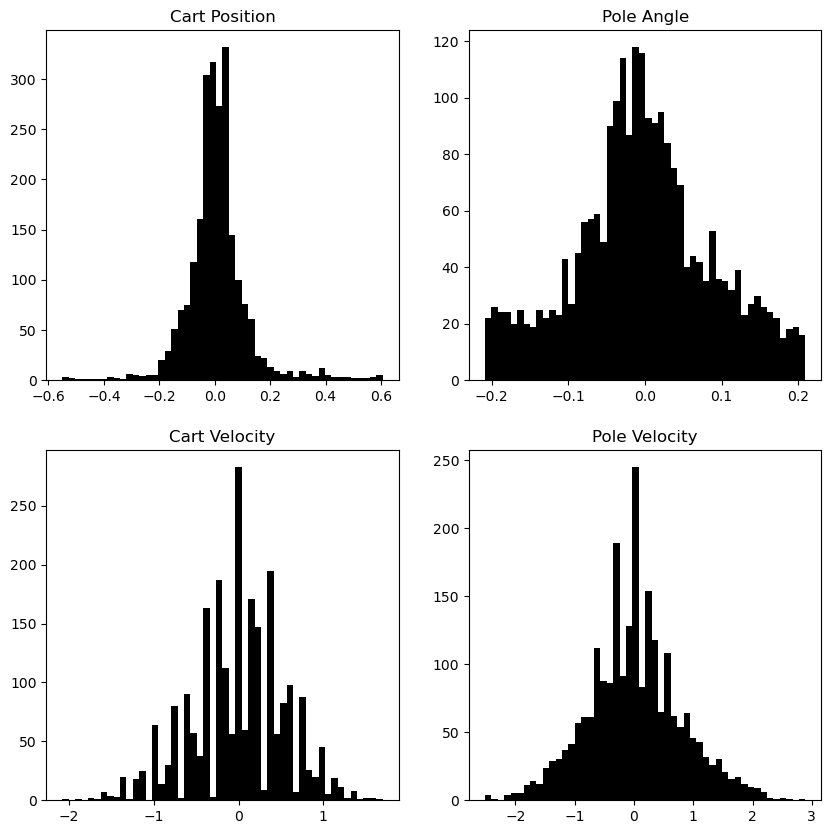

In [5]:
utils.plot_distribution(observation_data, Config.nbins)

In [6]:
bins = utils.get_bins_dynamic(observation_data, Config.nbins)

*Test discretization. Looks good.*

In [7]:
env.reset()
test_obs = utils.get_state_distribution(env)
binned_test_obv = utils.to_discrete(test_obs, bins)

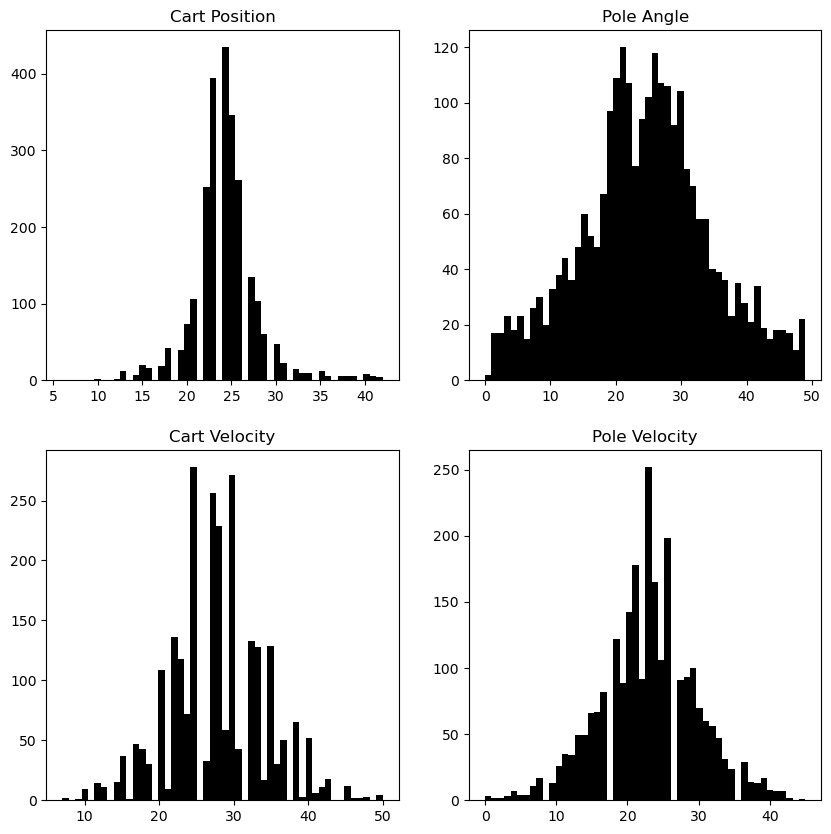

In [8]:
utils.plot_distribution(binned_test_obv, Config.nbins)

# Policy Iteration

WIP I want to die.

In [9]:
#from policy_iteration import PolicyIteration
#policy_instance = PolicyIteration(env.action_space.n, bins.shape, env, bins, gamma=0.99)
#policy_instance.V.sum()
#policy_instance.V.max()

In [10]:
#policy_instance.run()

In [11]:
#np.sum(policy_instance.V != 0)

# Q-Learning

Agent using an "off-policy" and q-table.

In [12]:
from q_learning import QLearning

In [13]:
ql = QLearning(env.action_space.n, bins.shape, env, bins)

In [14]:
ql_episode_rewards = ql.train(n_episodes=1000, logger=100)

Episode 0, Average Reward: 10.00
Episode 100, Average Reward: 10.06
Episode 200, Average Reward: 10.49
Episode 300, Average Reward: 9.96
Episode 400, Average Reward: 10.46
Episode 500, Average Reward: 10.68
Episode 600, Average Reward: 10.64
Episode 700, Average Reward: 10.94
Episode 800, Average Reward: 10.70
Episode 900, Average Reward: 10.47


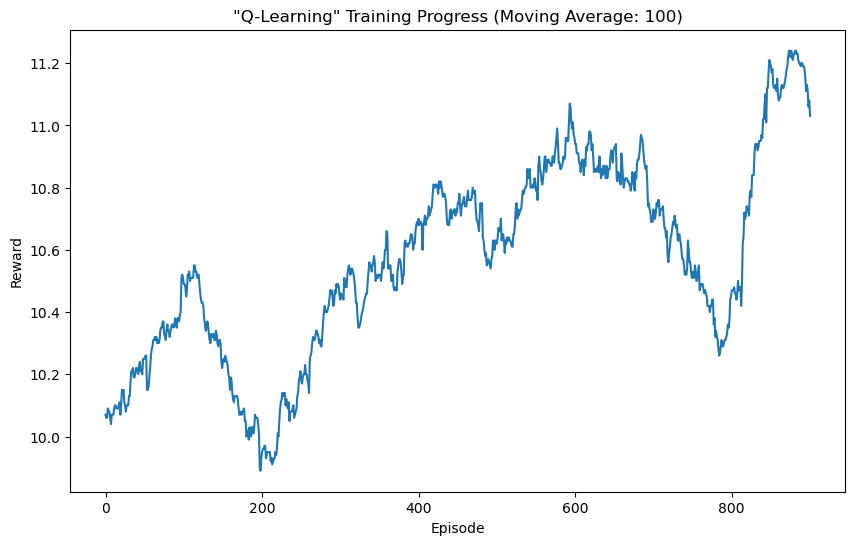

In [15]:
performance_logger.plot_training_progress(ql_episode_rewards, '"Q-Learning"')

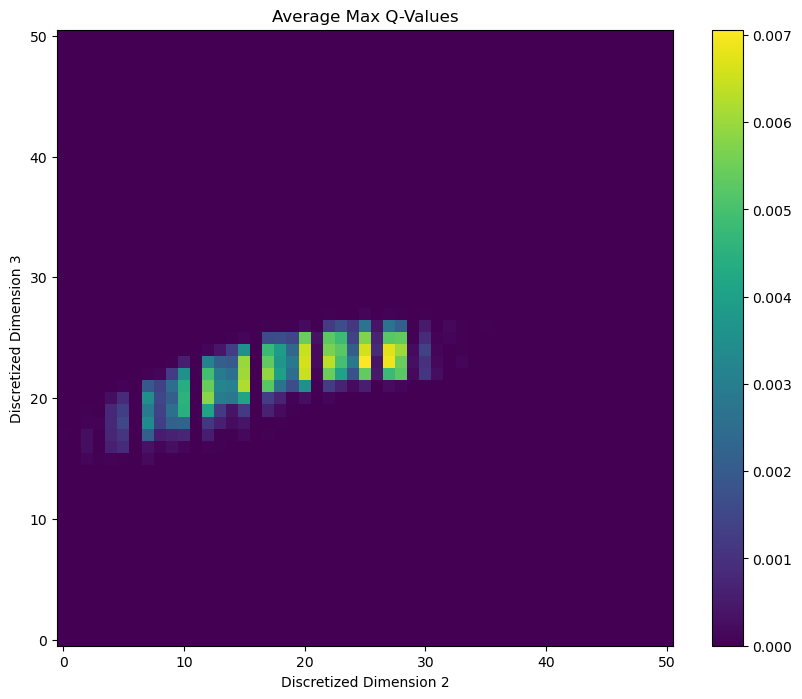

In [16]:
performance_logger.visualize_q_values_2D(ql.Q, 2, 3)

## Log Data

Log data that would be relevent for report. 

# SARSA

Agent using an "on-policy" and q-table.

In [17]:
from sarsa import Sarsa

In [18]:
sarsa = Sarsa(env.action_space.n, bins.shape, env, bins)

In [19]:
sarsa_episode_rewards = sarsa.train(n_episodes=1000, logger=100)

Episode 0, Average Reward: 10.00
Episode 100, Average Reward: 10.22
Episode 200, Average Reward: 10.62
Episode 300, Average Reward: 10.32
Episode 400, Average Reward: 10.25
Episode 500, Average Reward: 10.45
Episode 600, Average Reward: 10.26
Episode 700, Average Reward: 10.71
Episode 800, Average Reward: 10.57
Episode 900, Average Reward: 10.40


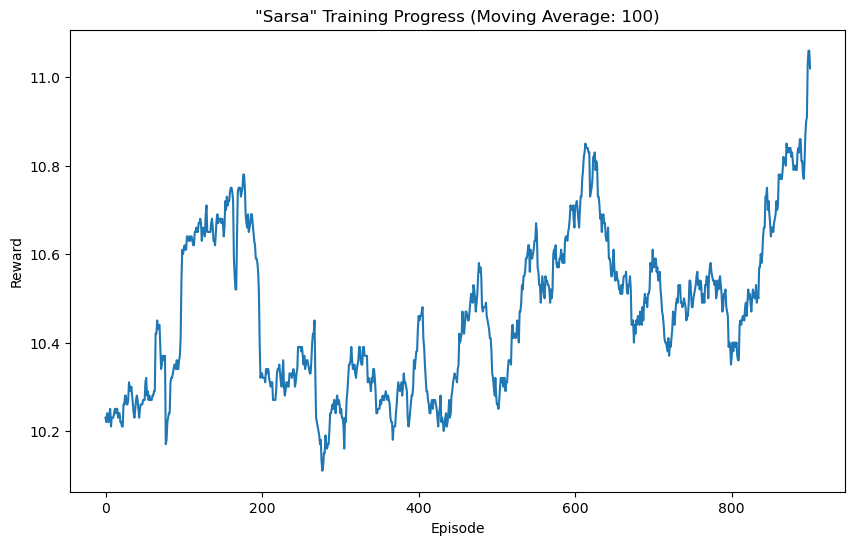

In [20]:
performance_logger.plot_training_progress(sarsa_episode_rewards, '"Sarsa"')

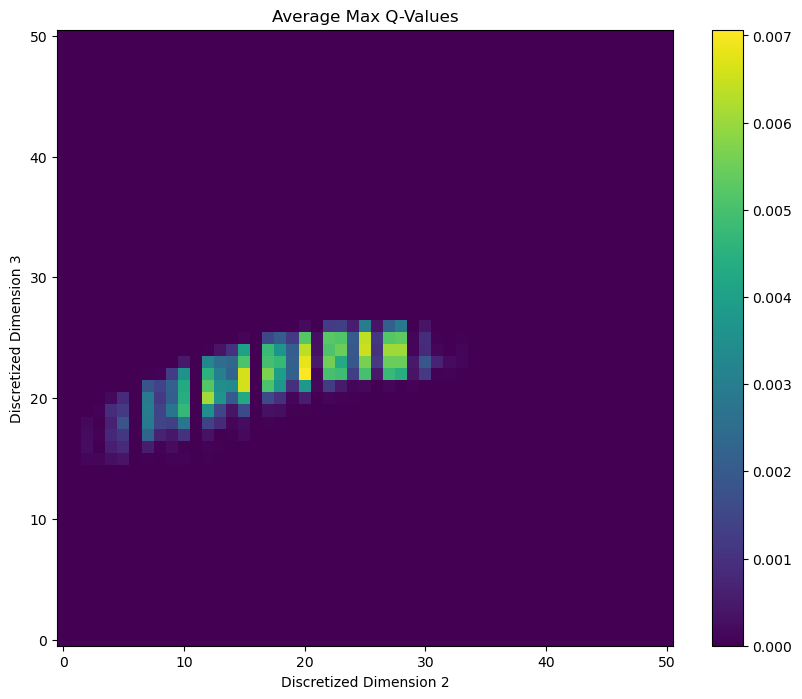

In [21]:
performance_logger.visualize_q_values_2D(sarsa.Q, 2, 3)

## Log Data

Log data that would be relevent for report. 

# Monte Carlo Prediction

Agent that uses monte carlo q-value estimation to learn q-table values.

In [22]:
from monte_pred import MonteCarloQTable

In [23]:
mcql = MonteCarloQTable(env.action_space.n, bins.shape, env, bins)

In [24]:
mcql_episode_rewards = mcql.train(n_episodes=1000, logger=100)

Episode 0, Average Reward: 12.00
Episode 100, Average Reward: 10.19
Episode 200, Average Reward: 10.58
Episode 300, Average Reward: 11.15
Episode 400, Average Reward: 11.75
Episode 500, Average Reward: 12.51
Episode 600, Average Reward: 14.61
Episode 700, Average Reward: 13.89
Episode 800, Average Reward: 14.09
Episode 900, Average Reward: 17.99


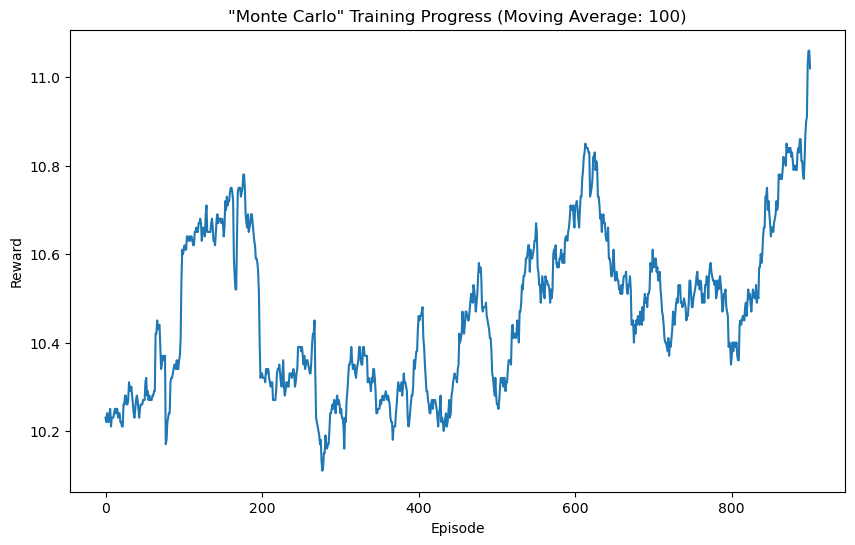

In [25]:
performance_logger.plot_training_progress(sarsa_episode_rewards, '"Monte Carlo"')

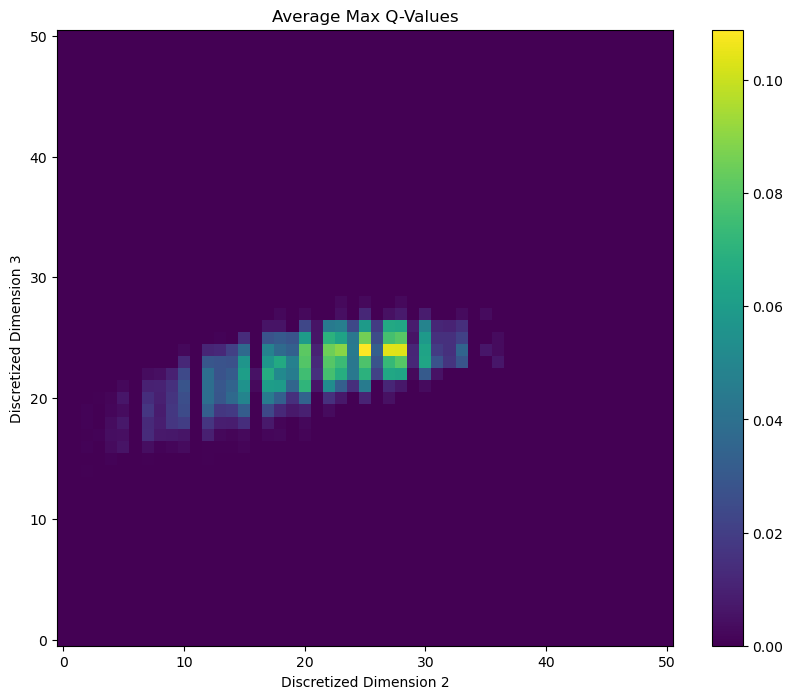

In [26]:
performance_logger.visualize_q_values_2D(mcql.Q, 2, 3)

## Log Data

Log data that would be relevent for report. 

# Hyperparameter Tuning

Obtaining the best results (in the quickest time?). 